/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


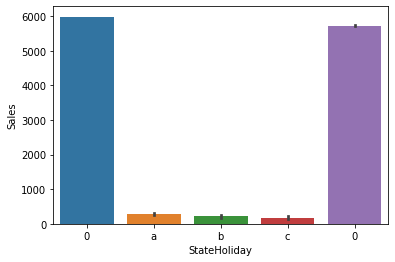

In [47]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("train.csv") 
# these files should be in the same directory the jupyter notebook is created
store = pd.read_csv("store.csv")

# merge the two dataframes
df_new = df.merge(store, on = ["Store"], how = "inner")

# Print the unique values
print("Number of Stores", len(df_new["Store"].unique()))
print("Unique Dates", len(df_new["Date"].unique()))

# Find the mean of sales
print(df_new["Sales"].mean())

# Find the number of days and count for each day of the week
df_new["DayOfWeek"].value_counts()

# import numpy
import numpy as np

# create new columns for days, weeks, months using information in date column
df_new["Date"] = pd.to_datetime(df_new["Date"], infer_datetime_format = True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

# plot data to visualize
%matplotlib inline
from matplotlib import pyplot as plt

# plot the histogram for sales
plt.hist(df_new["Sales"])

# plot histogram for everything
df_new.hist(figsize = (20,10))

# find null value percentage
print(df_new.isnull().sum()/len(df_new)*100)

# fill null values with mode of the column
mode_cd = df_new["CompetitionDistance"].mode()
cd_new = df_new["CompetitionDistance"].fillna(mode_cd[0])
df_new["CompetitionDistance"] = cd_new

# do it for all columns
df_new["PromoInterval"] = df_new["PromoInterval"].fillna(
    df_new["PromoInterval"].mode()[0])

# check that the percentage of null values is zero
print(df_new.isnull().sum()/len(df_new)*100)

# plot categorical plots for columns that have categories
ax = sns.barplot(x = "StateHoliday", y = "Sales", data = df_new)

# information about the data
df_new.info()

# find the count of each value according to category
print(pd.crosstab(df_new["Assortment"], df_new["Sales"]))
